# MMR Truncate

## 1. Setup

In [285]:
import copy

import seaborn as sns
from tqdm.auto import tqdm
from typing import Callable, Optional, List

import torch


from transformers import AutoTokenizer, AutoConfig, AutoModel
from transformers import BertModel

## 2. Model

In [231]:
model = AutoModel.from_pretrained('klue/bert-base')

Some weights of the model checkpoint at klue/bert-base were not used when initializing BertModel: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.decoder.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.bias', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


## 3. Selection

In [257]:
def select_weight(
    weight: torch.Tensor, 
    select_fn: Callable, 
    out_size: int,
    in_indices: Optional[List[int]] = None
) -> torch.Tensor:
    
    if in_indices is None:
        in_indices = list(range(weight.size(0)))
    
    selected = weight[sorted(in_indices), :]
    out_indices = select_fn(selected, out_size)
    selected = selected[:, sorted(out_indices)]
    return selected, out_indices


def select_embedding(
    embedding: torch.nn.Embedding,
    select_fn: Callable,
    out_size: int,
    in_indices: Optional[List[int]] = None
):
    
    selected_embedding = copy.deepcopy(embedding)
    selected_embedding.weight.data, out_indices = select_weight(embedding.weight.data, select_fn, out_size, in_indices)
    selected_embedding.embedding_dim = out_size
    return selected_embedding, out_indices


def select_layernorm(
    layernorm: torch.nn.LayerNorm,
    in_indices: Optional[List[int]] = None
):
    
    selected = copy.deepcopy(layernorm)
    selected.weight.data = layernorm.weight.data[in_indices]
    selected.bias.data = layernorm.bias.data[in_indices]
    selected.normalized_shape = (len(in_indices),)
    return selected

In [290]:
def truncate_from_beginning(weight, out_size):
    return list(range(0, out_size))

In [ ]:
def select_linear(
    linear: torch.nn.Linear,
)

In [289]:
class SelectedBertModel(BertModel):
    def __init__(self, select_fn, *args, **kwargs):
        super().__init__(*args, **kwargs)
    
    def hi(self):
        return 'hi'

In [291]:
self = SelectedBertModel.from_pretrained('klue/bert-base', select_fn=truncate_from_beginning)

TypeError: __init__() got multiple values for argument 'select_fn'

In [288]:
self

SelectedBertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(32000, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0): BertLayer(
        (attention): BertAttention(
          (self): BertSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False)
  

In [284]:
torch.nn.Linear

torch.nn.modules.linear.Linear

In [259]:
type(model.embeddings.word_embeddings) == torch.nn.Embedding

True

In [281]:
l.weight

Parameter containing:
tensor([0.9077, 0.9172], requires_grad=True)

In [271]:
e, o = select_embedding(model.embeddings.word_embeddings, truncate_from_beginning, 32)

In [267]:
model.embeddings.word_embeddings.weight.size()

torch.Size([32000, 768])

In [ ]:
def select_bert_embeddings()

In [246]:
weight = model.embeddings.word_embeddings.weight.dat

In [253]:
selected = select_weight(weight, truncate_from_beginning, 30, [10, 100])

In [255]:
selected

tensor([[ 0.0218, -0.0430,  0.0016,  0.0012,  0.0081, -0.0604,  0.0584, -0.0195,
          0.0224, -0.0324, -0.0444, -0.0150, -0.0250, -0.0624,  0.0254,  0.1115,
          0.0820, -0.0450, -0.0828, -0.0437,  0.0029,  0.0282,  0.0303,  0.0511,
         -0.0297, -0.0549, -0.0403, -0.0653,  0.0193, -0.0010],
        [-0.0043,  0.0374, -0.0141, -0.0527, -0.0092, -0.0076, -0.0329, -0.0575,
         -0.0177,  0.0500, -0.0334,  0.0406,  0.0419, -0.0177,  0.0271, -0.0073,
          0.0485, -0.0019, -0.0211,  0.0087, -0.0292,  0.0669,  0.0184,  0.0214,
          0.0507, -0.0025,  0.0319, -0.0709, -0.0313, -0.0453]])

In [256]:
weight[[10, 100]]

tensor([[ 0.0218, -0.0430,  0.0016,  ..., -0.0266,  0.0032, -0.0156],
        [-0.0043,  0.0374, -0.0141,  ..., -0.0347,  0.0478,  0.0201]])

In [254]:
(selected == weight[[10,100], :30]).float().mean()

tensor(1.)

In [244]:
weight[:, [100, 10, 30]].size()

torch.Size([32000, 3])

In [29]:
avg = model.embeddings.word_embeddings.weight.mean(dim=1)

In [208]:
weight = model.embeddings.word_embeddings.weight.data.clone()
out_indices = []

In [230]:
weight.abs().sum(dim=0)

tensor([ 984.4649,  998.0884, 2279.2961,  951.8703, 1418.3799,  939.9968,
        1062.8555, 1012.2714, 1158.0999, 1180.1974, 1027.3929, 1058.7764,
        1304.4991, 1007.2802, 1364.2076, 1132.8927,  996.8981, 1515.1633,
        1086.6049, 1110.1166,  976.1439,  994.7260, 1043.6582, 1034.8346,
        1046.9332, 1274.4771, 1086.9265, 1093.7247, 1189.1841, 1103.8533,
        1143.0940, 1058.6722,  992.2099, 1314.8062,  964.5457,  984.2122,
        1048.7859, 1139.2960,  944.6865, 1395.9482, 1739.8132, 1270.0148,
        1088.0190, 1194.2073, 1006.8663, 1363.7053,  988.4432, 1251.3711,
        1146.4199,  984.8639, 1245.8385, 1019.2603, 1029.6613,  977.4764,
        1020.4644, 1168.5349, 1001.6860, 1033.6204,  989.5688, 1029.5732,
        1270.3021, 1006.7663, 1077.1254, 1135.2522,  994.5516, 1098.6465,
        1081.6343, 1635.6329,  995.0287, 1348.7024, 1152.1523, 1245.1364,
        1521.7607,  980.3012, 1001.5403,  984.8663, 2217.4004,  998.1337,
         972.9622, 1513.3990, 1038.140

In [209]:
for _ in tqdm(range(384)):
    indices = torch.tensor([i for i in range(768) if i not in out_indices])
    
    selected = torch.index_select(weight, dim=1, index=indices)
    avg = selected.mean(dim=1)
#     avg = selected.max(dim=1)[0]
    idx = torch.matmul(avg, selected).argmax()
    out_indices.append(int(indices[idx]))

  0%|          | 0/384 [00:00<?, ?it/s]

In [188]:
out_indices

[170,
 272,
 643,
 714,
 696,
 391,
 90,
 2,
 406,
 354,
 554,
 192,
 632,
 629,
 484,
 115,
 142,
 152,
 93,
 147,
 679,
 183,
 262,
 429,
 400,
 562,
 85,
 107,
 343,
 545,
 735,
 127,
 40,
 67,
 584,
 79,
 14,
 245,
 749,
 180,
 178,
 504,
 760,
 8,
 227,
 599,
 524,
 346,
 656,
 403,
 399,
 437,
 66,
 466,
 302,
 316,
 534,
 743,
 348,
 487,
 711,
 544,
 57,
 282,
 493,
 521,
 311,
 725,
 673,
 755,
 320,
 564,
 88,
 195,
 560,
 645,
 680,
 289,
 351,
 748,
 112,
 670,
 367,
 678,
 638,
 752,
 610,
 304,
 671,
 441,
 455,
 333,
 369,
 133,
 213,
 237,
 697,
 38,
 54,
 574,
 492,
 217,
 279,
 727,
 312,
 702,
 295,
 6,
 32,
 549,
 280,
 363,
 586,
 418,
 84,
 140,
 355,
 548,
 389,
 89,
 666,
 317,
 332,
 672,
 587,
 594,
 156,
 746,
 424,
 718,
 392,
 118,
 719,
 717,
 248,
 384,
 122,
 602,
 104,
 242,
 445,
 378,
 34,
 528,
 374,
 376,
 379,
 663,
 426,
 499,
 244,
 247,
 758,
 622,
 759,
 577,
 124,
 268,
 386,
 340,
 762,
 35,
 328,
 258,
 166,
 200,
 689,
 229,
 292,
 284,
 10

In [217]:
selected = torch.index_select(weight, dim=1, index=torch.tensor(sorted(out_indices)))

In [201]:
corr = torch.corrcoef(weight.transpose(-1, -2))
corr -= torch.eye(768)

In [202]:
corr.abs().mean()

tensor(0.0384)

In [218]:
corr2 = torch.corrcoef(selected.transpose(-1, -2))
corr2 -= torch.eye(384)

In [219]:
corr2.abs().mean()

tensor(0.0525)

<AxesSubplot:>

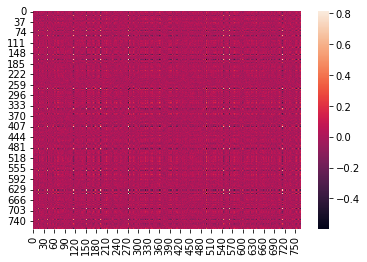

In [220]:
sns.heatmap(corr)

<AxesSubplot:>

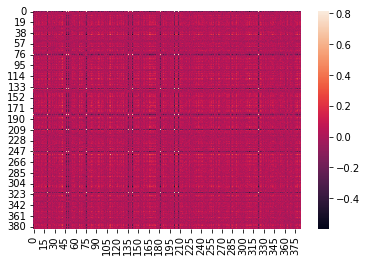

In [221]:
sns.heatmap(corr2)